# Transfer Learning via InceptionV3

** mostly forked from https://github.com/deadskull7/Pneumonia-Diagnosis-using-XRays-96-percent-Recall/blob/master/Transfer%20Learning%20via%20InceptionV3.ipynb **

In [2]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
# from skimage.transform import resize
print(os.listdir("../input/chest_xray/chest_xray/"))

['.DS_Store', 'test', 'train', 'val']


In [3]:
print(os.listdir("../input/chest_xray/chest_xray/train/"))

['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [4]:
TRAIN_DIR = "../input/chest_xray/chest_xray/train/"
TEST_DIR =  "../input/chest_xray/chest_xray/test/"

In [5]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

**Pre-processing**

In [6]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
#                 cv2.resize(img, (150, 150))
                img = cv2.resize(img, (150, 150))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [7]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = cv2.resize(img, (150, 150))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(299, 299, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [8]:
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████| 3876/3876 [08:17<00:00,  7.78it/s]


In [9]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 390/390 [00:45<00:00,  8.52it/s]


In [10]:
print(X_train.shape,'\n',X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [11]:
print(y_train.shape,'\n',y_test.shape)

(5216,) 
 (624,)


In [12]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [13]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

## Plotting the XRays of No Pneumonia and Pneumonia patients.

In [14]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = cv2.resize(imagep1, (150, 150))
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = cv2.resize(imagen1, (150, 150))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 1 Axes>

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 1 Axes>

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 1 Axes>

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 1 Axes>

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


<Figure size 1000x500 with 1 Axes>

In [15]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


**Reducing the learning rate timely using callbacks in Keras and also checkpointing the model when achieved the best so far quantity that is monitored , in this dataset I am monitoring validation accuracy.**

**Saving the weights of the best model after checkpointing in transferlearning_weights.hdf5 .**

In [20]:
filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [21]:
from keras.models import Sequential , Model
from keras.layers import Dense , Activation
from keras.layers import Dropout , GlobalAveragePooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [22]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

**Importing InceptionV3 from Keras but with no weights. Also define the necessary input shape of the resized images which were resized initially. The default image size is 299 X 299 for InceptionV3.**

In [23]:
from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights=None, include_top=False , input_shape=(3,150, 150))

**The output of the above model was being fed into the after layers that we are laying down. There is no rule of thumb for laying down the after layers after InceptionV3 but practice and intuition. **

**The layers were checked multiple times for the output and finally the second last layer of BatchNormalization() did some good for the model. **

In [24]:
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='sigmoid')(x)

**Here the I have not debarred any of the InceptionV3 layers to train themselves and rather training only the added layers. I have trained the whole network from start for the different hyperparameters. This approach gave me one of the best results so far. **

In [25]:
base_model.load_weights("../input/inceptionweights/inception_v3_weights.h5")

**Loading the best set of weights on the model which were attained by checkpointing and saving the weights in between the epochs and also prior to overfitting of the model. **

In [26]:
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

**Architecture of  Layers. **

In [28]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 3, 150, 150)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 32, 74, 74)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 32, 74, 74)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 32, 74, 74)   0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

batch_normalization_187 (BatchN (None, 384, 3, 3)    1152        conv2d_187[0][0]                 
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 192, 3, 3)    393216      average_pooling2d_18[0][0]       
__________________________________________________________________________________________________
batch_normalization_180 (BatchN (None, 320, 3, 3)    960         conv2d_180[0][0]                 
__________________________________________________________________________________________________
activation_182 (Activation)     (None, 384, 3, 3)    0           batch_normalization_182[0][0]    
__________________________________________________________________________________________________
activation_183 (Activation)     (None, 384, 3, 3)    0           batch_normalization_183[0][0]    
__________________________________________________________________________________________________
activation

In [29]:
batch_size = 64
epochs = 2

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - 34465s 7s/step - loss: 0.2510 - acc: 0.8990 - val_loss: 1.1404 - val_acc: 0.7115

Epoch 00001: val_acc improved from -inf to 0.71154, saving model to transferlearning_weights.hdf5
Epoch 2/10
5216/5216 [==============================] - 33511s 6s/step - loss: 0.1841 - acc: 0.9325 - val_loss: 0.9385 - val_acc: 0.7324

Epoch 00002: val_acc improved from 0.71154 to 0.73237, saving model to transferlearning_weights.hdf5
Epoch 3/10
1408/5216 [=======>......................] - ETA: 6:24:30 - loss: 0.2554 - acc: 0.9162

In [30]:
model.load_weights("transferlearning_weights.hdf5")

In [32]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

**Confusion matrix is very much necessary for the above model because we are having unequal number of people with pneumonia and no pneumonia. In the above dataset we are having more people suffering from pneumonia than normal people. So, as I told in other notebook , accuracy won't be the soul criteria for determining model performance.**

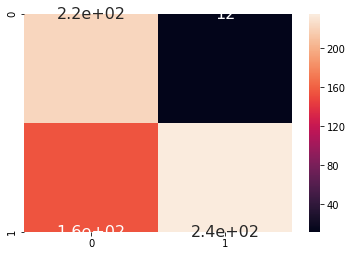

In [34]:
CM = confusion_matrix(y_true, pred)
import seaborn as sns
sns.heatmap(CM, annot=True,annot_kws={"size": 16})

**Notice how the confusion matrix changed from other notebook and became even better than before. **

In [38]:
precision_ = 240 / (240 + 12)
print(precision_)

0.9523809523809523


##### 95% Precision!!!

In [ ]:
_ , y_testfinal = get_data(TEST_DIR)

In [1]:
##### for homework assignment to show "2 examples of it making predictions on images from the testing dataset" 
# I'm using the "pred" array as it is already the vector of predicted values for the X_test matrix.
# The code below pulls 2 samples from the pred database and compares them to the actual classification of the test set.

In [55]:
from random import randrange
finalcheck = []

for i in range(2):
    checkthis = randrange(y_testfinal.shape[0])
    while checkthis in finalcheck:
        checkthis = randrange(y_testfinal.shape[0])
    finalcheck.append(checkthis)

    
for i in finalcheck:
    print(y_testfinal[i], " predicted to be ", pred[i])
    

1  predicted to be  0
0  predicted to be  0


In [ ]:
# woo!  1 out of 2!!